In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import decomposition as dcp

pd.set_option('display.max_columns', 60)

In [9]:
pip install pygal_maps_world

Note: you may need to restart the kernel to use updated packages.


In [10]:
from pygal_maps_world.maps import World

# Part 1. Hierarchical Clustering

Exceptionally, we use `scipy` rather than `scikit-learn` as scikit-learn does not have an easy module for drawing dendograms.


**Only run the cell below if you're using Anaconda**

In [4]:
conda install -c anaconda scipy


Note: you may need to restart the kernel to use updated packages.


**Everbody needs to run the cell below**

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
happiness=pd.read_csv("countries_indicators.csv")
happiness_quant=happiness.drop(columns=["Country or region","Code"])

## A. Basics of hierarchical clustering in Python

1. Use the code below to draw the dendogram using the `average` method you just saw by hand. Be sure to scroll all the way down to the end to see the dendrogram. How many clusters would you pick based on it?

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [35.0, 35.0, 45.0, 45.0],
  [20.0, 20.0, 40.0, 40.0],
  [55.0, 55.0, 65.0, 65.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [60.0, 60.0, 91.25, 91.25],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [215.0, 215.0, 225.0, 225.0],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [220.0, 220.0, 243.75, 243.75],
  [192.5, 192.5, 231.875, 231.875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [212.1875, 212.1875, 283.75, 283.75],
  [175.0, 175.0, 247.96875, 247.96875],
  [160.0, 160.0, 211.484375, 211.484375],
  [140.0, 140.0, 185.7421875, 185.7421875],
  [125.0, 125.0, 162.87109375, 162.87109375],
  [75.625, 75.625, 143.935546875, 143.935546875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 31

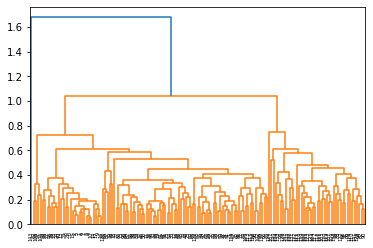

In [11]:
Z = linkage(happiness_quant,method='average')

dendrogram(Z)

2. Use the code below to find the cluster assignment for average linkage that gives the most balanced graph.

In [12]:
labels=fcluster(Z, 3, criterion='maxclust')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 3, 2], dtype=int32)

3. Use this code below to obtain the map of the world with this clustering. What do you think of the quality of the clusters?

In [13]:
df=pd.DataFrame(labels,columns=['Cluster'])
df["Code"]=happiness.Code

wm = World()
wm.force_uri_protocol = 'http'

cluster1=pd.Series.to_numpy(df[df["Cluster"]==1]["Code"])
cluster2=pd.Series.to_numpy(df[df["Cluster"]==2]["Code"])
cluster3=pd.Series.to_numpy(df[df["Cluster"]==3]["Code"])

wm.add('Cluster 1',cluster1)
wm.add('Cluster 2',cluster2)
wm.add('Cluster 3', cluster3)

wm.render_to_file('map3.svg')

## B. Different types of linkages

Use the code `Z = linkage(happiness_quant,method='average')` and `dendrogram(Z)` seen above changing each time the `method=` to something different (`average`, `single`, `complete`, `ward`). Which dendrogram do you prefer and why?

In [ ]:
Z = linkage(happiness_quant,method='average')
dendrogram(Z)

In [ ]:
Z = linkage(happiness_quant,method='single')
dendrogram(Z)

In [ ]:
Z = linkage(happiness_quant,method='complete')
dendrogram(Z)

In [ ]:
Z = linkage(happiness_quant,method='complete')
dendrogram(Z)

# Part 2. Boats Case Part II

We start off by importing the scores for each new feature obtained above on each observation.

In [86]:
boats_q1_pca=pd.read_csv("boats_q1_pca.csv")

In [87]:
boats_q1_pca

,on the side,economical,nature,expert,status
0,-1.719039,-2.698362,2.887862,-1.484586,4.597560
1,-0.420806,-1.190353,0.298038,-0.533077,2.486728
2,-0.823565,-2.321877,-0.523040,-1.393190,3.773357
3,-0.625359,-1.297235,1.255209,0.482598,2.346932
4,-2.987750,-1.778447,0.803376,1.500042,3.950186
...,...,...,...,...,...
2808,-1.840471,-3.328001,1.488468,-0.297689,0.979345
2809,3.009885,-1.473192,-7.988411,1.650892,-4.776727
2810,0.067230,0.734457,-2.528899,0.557880,1.186885
2811,-0.820705,0.105423,-1.790164,0.590520,0.122459


1. Using `scipy`, create and visualize a dendrogram `Z` with `method="ward"` based on `boats_q1_pca`. How many clusters should we pick to get approximately equal sized clusters?

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [55.0, 55.0, 65.0, 65.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [60.0, 60.0, 82.5, 82.5],
  [21.25, 21.25, 71.25, 71.25],
  [105.0, 105.0, 115.0, 115.0],
  [125.0, 125.0, 135.0, 135.0],
  [110.0, 110.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [152.5, 152.5, 182.5, 182.5],
  [120.0, 120.0, 167.5, 167.5],
  [46.25, 46.25, 143.75, 143.75],
  [215.0, 215.0, 225.0, 225.0],
  [205.0, 205.0, 220.0, 220.0],
  [235.0, 235.0, 245.0, 245.0],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [240.0, 240.0, 262.5, 262.5],
  [212.5, 212.5, 251.25, 251.25],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [345.0, 345.0, 355.0, 355.0],
  [335.0, 335.0, 350.0, 350.0],
  [325.0, 325.0, 342.5, 342.

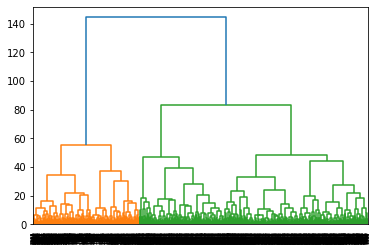

In [88]:
Z = linkage(boats_q1_pca,method='ward')
dendrogram(Z)

2. We take 5 clusters. Obtain the labels using code seen in class. Call these `labels_hierarchical_clustering`.

In [89]:
labels_hierarchical_clustering=fcluster(Z, 5, criterion='maxclust') 

3. Now use Kmeans() with `n_clusters=5` and `n_init=20` on `boats_q1_pca`. Obtain the labels using the code seen in class. Call these labels `labels_kmeans`.

In [90]:
labels_kmeans=KMeans(n_clusters=5,n_init=20).fit(boats_q1_pca).labels_

## Run the code below for visualizing the heatmaps seen in class *(Optional)*

Make sure to download `boats_q2_q15` from the website. Make sure also to install seaborn.

In [91]:
import seaborn as sns
boats_q2_q15=pd.read_csv("boats_q2_q15.csv")

Text(33.0, 0.5, 'Cluster')

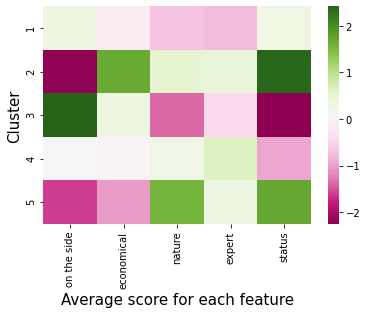

In [92]:
boats_q1_pca_km=boats_q1_pca.copy()
boats_q1_pca_km["Labels"]=labels_kmeans #use the labels obtained
boats_q1_pca_km_clust=boats_q1_pca_km.groupby(boats_q1_pca_km["Labels"]).mean().reset_index() #take the average over the 5 new features based on the clusters
boats_q1_pca_km_clust=boats_q1_pca_km_clust.drop(columns=["Labels"]).set_index(np.arange(1,6)) #obtain a dataframe that contains this information
sns.heatmap(boats_q1_pca_km_clust,cmap="PiYG") #plot a heatmap of this

import matplotlib.pyplot as plt # for data visualization

plt.xlabel('Average score for each feature', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Cluster', fontsize = 15) # y-axis label with fontsize 15

Text(33.0, 0.5, 'Cluster')

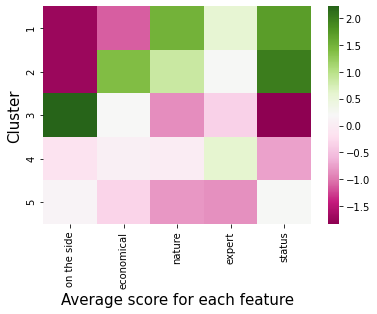

In [93]:
boats_q1_pca_hier=boats_q1_pca.copy()
boats_q1_pca_hier["Labels"]=labels_hierarchical_clustering
boats_q1_pca_hier_clust=boats_q1_pca_hier.groupby(boats_q1_pca_hier["Labels"]).mean().reset_index()
boats_q1_pca_hier_clust=boats_q1_pca_hier_clust.drop(columns=["Labels"]).set_index(np.arange(1,6))
sns.heatmap(boats_q1_pca_hier_clust,cmap="PiYG")

plt.xlabel('Average score for each feature', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('Cluster', fontsize = 15) # y-axis label with fontsize 15

We use the hierarchical clustering labels moving forward. Our goal now is to profile our clusters.

To do this, we use the data from Questions 2 to 15. The process we go through is the following:
* scale each feature in Q2-Q15: indeed some such as income or age can be quite high comparatively to the rest and we would like to use heatmaps to contrast. Scaling however keeps the distribution: if an observation had e.g. very high Q2 in the initial dataset it will still have very high Q2 in the scaled dataset.
* associate to each scaled observation the label from kmeans
* obtain "average" Q2-Q15 answers for each cluster: this gives us an idea of the type of person contained in each cluster. We use `groupby` to do this
* plot on a heatmap the average answer to each question for each cluster. We are thus able to profile the sets.

Run the code below to go through this process.

Text(0.5, 69.0, 'Cluster')

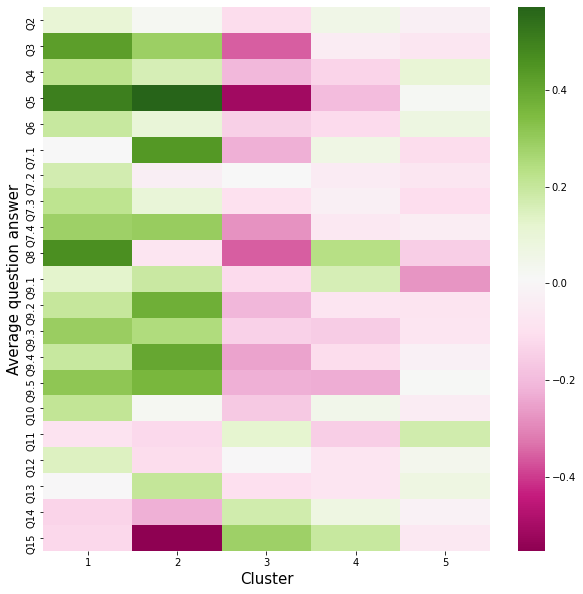

In [94]:
boats_q2_q15_scaled=preprocessing.scale(boats_q2_q15) #preprocess the data
boats_q2_q15_df=pd.DataFrame(boats_q2_q15_scaled, columns=boats_q2_q15.columns) #make the preprocessed data into a dataframe
boats_q2_q15_df["Labels"]=labels_hierarchical_clustering #add a labels column to each scaled observation
boats_q2_q15_df=boats_q2_q15_df.groupby(boats_q2_q15_df["Labels"]).mean().set_index(np.arange(1,6))
#group by labels and take the mean of the scaled values in every category
plt.figure(figsize=(10,10))
sns.heatmap(boats_q2_q15_df.T,cmap="PiYG") #creates heatmap
plt.ylabel('Average question answer', fontsize = 15) # x-axis label with fontsize 15
plt.xlabel('Cluster', fontsize = 15) # y-axis label with fontsize 15